**TRAINING THE CNN**


In [14]:
# Convolutional Neural Network

# Installing Keras
# Enter the following command in a terminal (or anaconda prompt for Windows users): conda install -c conda-forge keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 500,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 100)

Found 238 images belonging to 2 classes.
Found 45 images belonging to 2 classes.
Epoch 1/5
500/500 [==============================] - 67s 133ms/step - loss: 0.0382 - acc: 0.9836 - val_loss: 9.7691e-04 - val_acc: 1.0000
Epoch 2/5
500/500 [==============================] - 66s 131ms/step - loss: 8.2953e-04 - acc: 0.9999 - val_loss: 6.9191e-04 - val_acc: 1.0000
Epoch 3/5
500/500 [==============================] - 65s 130ms/step - loss: 3.0073e-05 - acc: 1.0000 - val_loss: 4.3751e-04 - val_acc: 1.0000
Epoch 4/5
500/500 [==============================] - 65s 131ms/step - loss: 1.1642e-05 - acc: 1.0000 - val_loss: 3.9712e-04 - val_acc: 1.0000
Epoch 5/5
500/500 [==============================] - 65s 130ms/step - loss: 5.3697e-06 - acc: 1.0000 - val_loss: 6.0632e-04 - val_acc: 1.0000


**SAVING THE CNN AND PREDICTING A NEW TEST IMAGE**

[[1]]


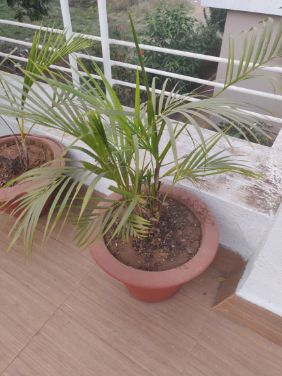

------------PREDICTION--------------
The predicted image is :  plant
The probability of the image being a plant is 100% 


In [51]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 22 18:20:39 2020

@author: hp
"""

from keras.models import load_model
import cv2
import numpy as np

model = load_model('model.h5')
'''
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
'''
imageee = 'test_plant.jpg'
img = cv2.imread(imageee)
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)
probabilities = model.predict_proba(img)
print(classes)

from google.colab.patches import cv2_imshow
cvimg = cv2.imread(imageee)
cv2_imshow(cvimg)
if classes == [[1]]:
  pred = 'plant'
else:
  pred = 'chair'
  probabilities = 1 - probabilities



print("------------PREDICTION--------------")
print("The predicted image is : ",pred)
print('The probability of the image being a {} is {}% '.format(pred,int(probabilities*100)))

[[0]]


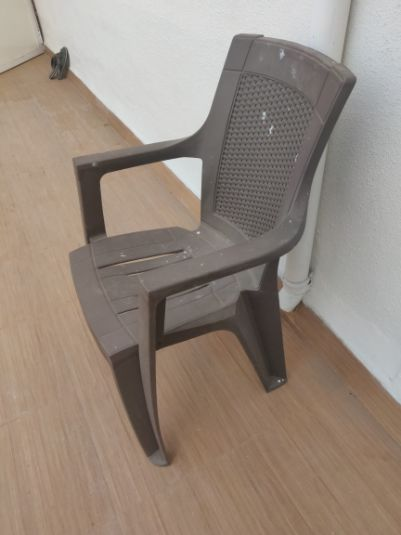

------------PREDICTION--------------
The predicted image is :  chair
The probability of the image being a chair is 100% 


In [52]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('model.h5')
'''
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
'''
imageee = 'test.jpg'
img = cv2.imread(imageee)
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)
probabilities = model.predict_proba(img)
print(classes)

from google.colab.patches import cv2_imshow
cvimg = cv2.imread(imageee)
cv2_imshow(cvimg)
if classes == [[1]]:
  pred = 'plant'
else:
  pred = 'chair'
  probabilities = 1 - probabilities



print("------------PREDICTION--------------")
print("The predicted image is : ",pred)
print('The probability of the image being a {} is {}% '.format(pred,int(probabilities*100)))